### Task 1

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [123]:
from sklearn.datasets import load_boston
boston = load_boston()

In [124]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

In [127]:
columns = X_train.columns

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns)

In [128]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

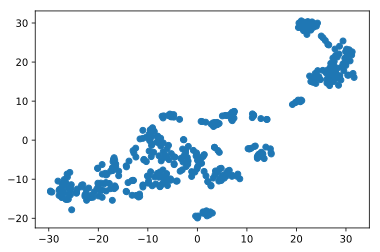

In [129]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Task 2

In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

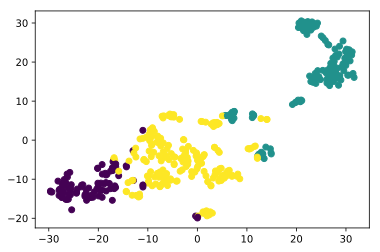

In [131]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [132]:
for i in range(pd.value_counts(labels_train).shape[0]):
    print(f'cluster {i} mean price: {y_train[labels_train == i].mean().values[0]}')

cluster 0 mean price: 27.788372093023252
cluster 1 mean price: 16.165354330708666
cluster 2 mean price: 24.958115183246072


In [133]:
for i in range(pd.value_counts(labels_train).shape[0]):
    print(f'cluster {i} mean CRIM: {X_train.loc[labels_train == i, "CRIM"].mean()}')

cluster 0 mean CRIM: 0.07356558139534886
cluster 1 mean CRIM: 10.797028425196853
cluster 2 mean CRIM: 0.42166020942408367


### TASK 3

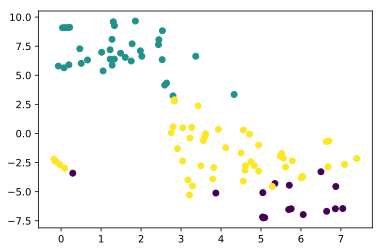

In [134]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [135]:
for i in range(pd.value_counts(labels_test).shape[0]):
    print(f'cluster {i} mean price: {y_test[labels_test == i].mean().values[0]}')

cluster 0 mean price: 31.35
cluster 1 mean price: 16.437142857142856
cluster 2 mean price: 21.860784313725492


In [136]:
for i in range(pd.value_counts(labels_test).shape[0]):
    print(f'cluster {i} mean CRIM: {X_test.loc[labels_test == i, "CRIM"].mean()}')

cluster 0 mean CRIM: 0.062060000000000004
cluster 1 mean CRIM: 10.165531142857143
cluster 2 mean CRIM: 0.26607882352941176
